<a href="https://colab.research.google.com/github/nanda3-vit/AI-and-ML-for-Cardiovascular-diseases-CVDs-/blob/main/ASCVD_(Heart)_Risk_by_ML_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ASCVD Heart Risk by Machine learning and Deep learning models**

In [1]:
# Basic Libraries

import numpy                  as np  # linear algebra
import pandas                 as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn                as sns # data visualization
import matplotlib.pyplot      as plt # plotting library

# Machine Learning Libraries

from sklearn.preprocessing    import StandardScaler 
from sklearn.model_selection  import train_test_split
from sklearn.metrics          import confusion_matrix, accuracy_score, classification_report
from sklearn                  import metrics

# Machine Learning Algorithms

from sklearn.linear_model     import LogisticRegression
from sklearn.linear_model     import SGDClassifier
from sklearn.neighbors        import KNeighborsClassifier
from sklearn.svm              import SVC
from sklearn.tree             import DecisionTreeClassifier
from sklearn.ensemble         import RandomForestClassifier

# To import dataset from kaggle

import os
for dirname, _, filenames in os.walk('/content/sample_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/heartRisk.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_train_small.csv


In [2]:
# Importing the Framingham dataset to our dataframe variable

df = pd.read_csv('/content/sample_data/heartRisk.csv')
df.head()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
0,1,1,0,1,1,49,101,181,32,11.1
1,0,0,0,1,1,69,167,155,59,30.1
2,0,1,1,1,1,50,181,147,59,37.6
3,1,1,1,1,0,42,145,166,46,13.2
4,0,0,1,0,1,66,134,199,63,15.1


In [3]:
# To check the total number of null values we have in each column

df.isnull().sum()

isMale            0
isBlack           0
isSmoker          0
isDiabetic        0
isHypertensive    0
Age               0
Systolic          0
Cholesterol       0
HDL               0
Risk              0
dtype: int64

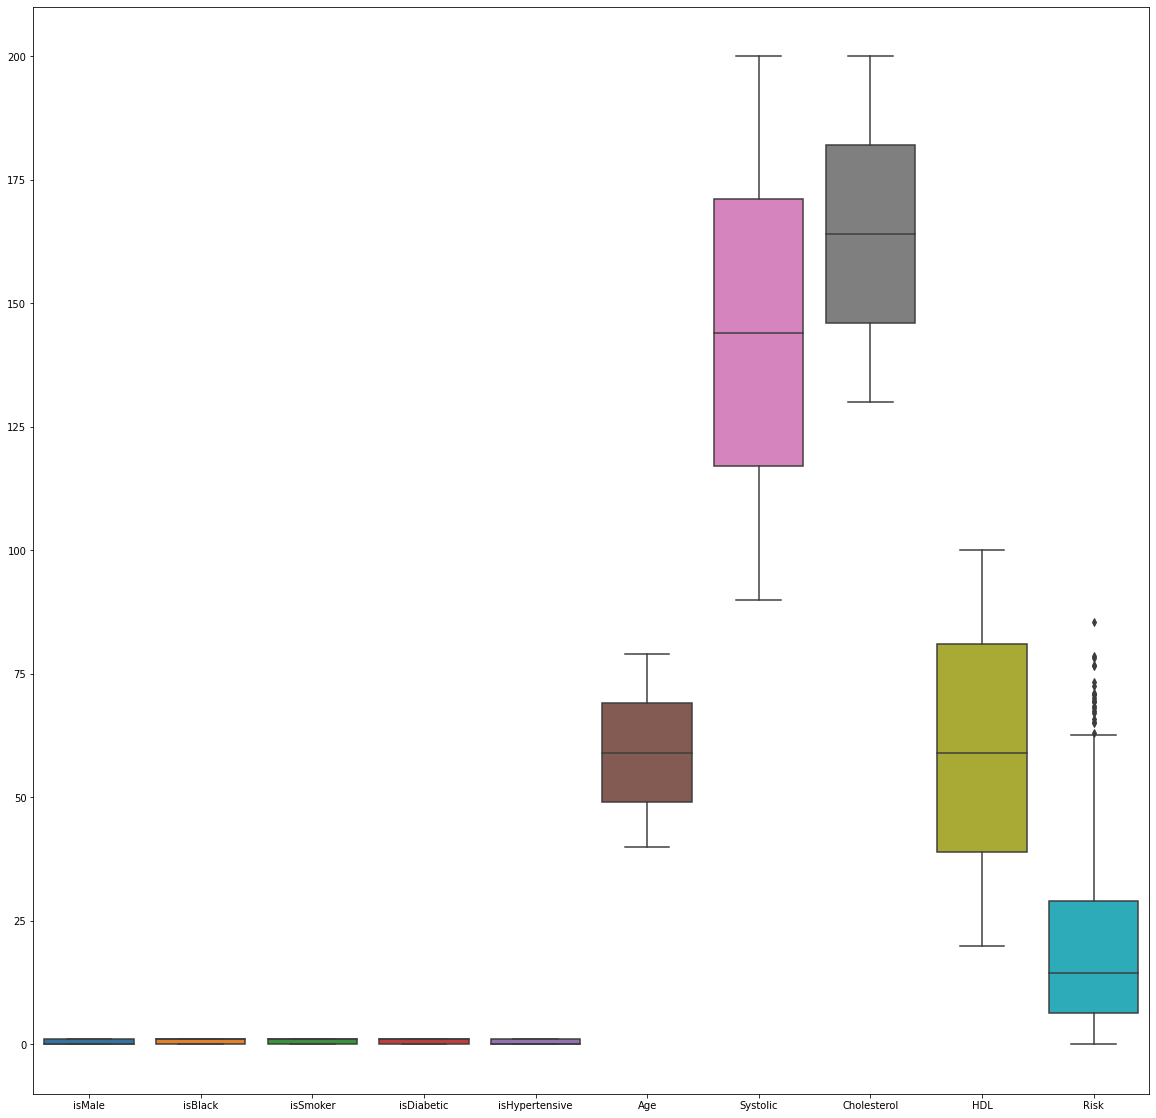

In [4]:
# To check for outliers, we are plotting a box-whisker plot.

plt.figure(figsize=(20,20), facecolor='w')
sns.boxplot(data=df)
plt.show()

In [5]:
# Finding the maximum values for 'totChol' and 'sysBP'

print(df['Cholesterol'].max())
print(df['Systolic'].max())

200
200


In [6]:
# Here we are manipulating the data to fit in range.

df = df[df['Cholesterol']<200.0]
df = df[df['Systolic']<200.0]
df.shape

(982, 10)

In [7]:
# Splitting the data into X and Y variables

X = df.values[:,0:-1]
Y = df.values[:,-1]

In [8]:
# Scaling The Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)

print(X)

[[ 1.0164282   0.95225843 -1.02893159 ... -1.3635207   0.85704442
  -1.15735324]
 [-0.98383732 -1.0501351  -1.02893159 ...  0.74404897 -0.43104471
  -0.02769399]
 [-0.98383732  0.95225843  0.97188191 ...  1.1911092  -0.82737982
  -0.02769399]
 ...
 [ 1.0164282   0.95225843  0.97188191 ...  1.09531058  0.75796064
  -1.2410317 ]
 [-0.98383732  0.95225843  0.97188191 ... -0.1500715   0.26254174
   0.26518063]
 [-0.98383732  0.95225843 -1.02893159 ...  1.22304207 -0.87692171
  -0.90631785]]


In [18]:
df.head()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
0,1,1,0,1,1,49,101,181,32,11.1
1,0,0,0,1,1,69,167,155,59,30.1
2,0,1,1,1,1,50,181,147,59,37.6
3,1,1,1,1,0,42,145,166,46,13.2
4,0,0,1,0,1,66,134,199,63,15.1


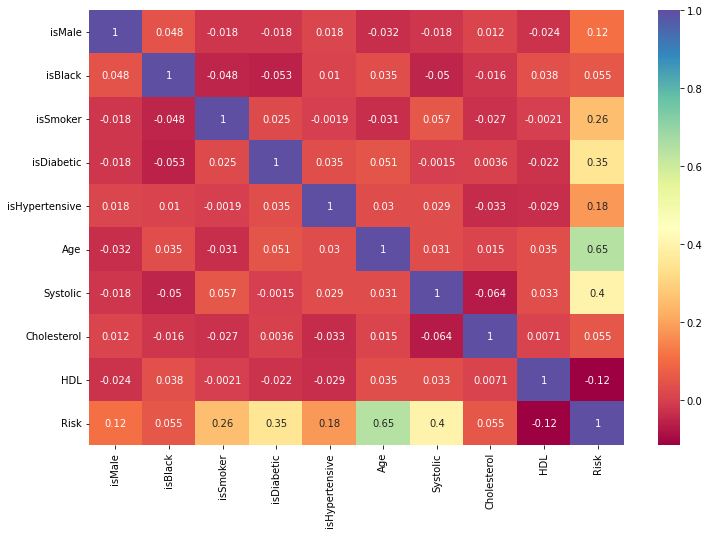

In [19]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, cmap = 'Spectral')

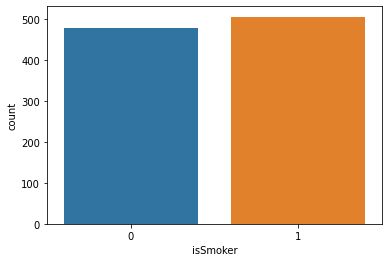

In [20]:
# near even split between smokers and nonsmokers
sns.countplot(x = 'isSmoker', data = df)

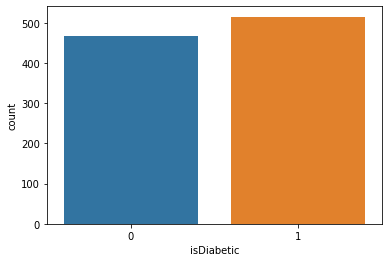

In [21]:
# near even split between diabetic and nondiabetic
sns.countplot(x = 'isDiabetic', data = df)

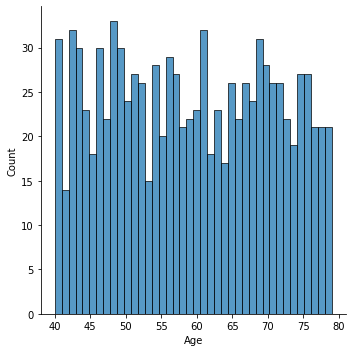

In [22]:
# reasonable represenation of ages between 40 and 80 within dataset
sns.displot(x = 'Age', data = df, bins = 40)

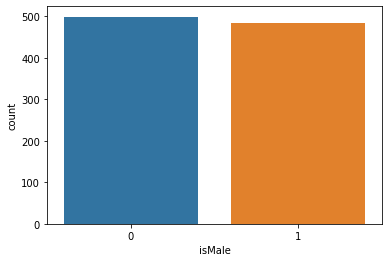

In [23]:
# close to even split between male and female subjects
sns.countplot(x = 'isMale', data = df)

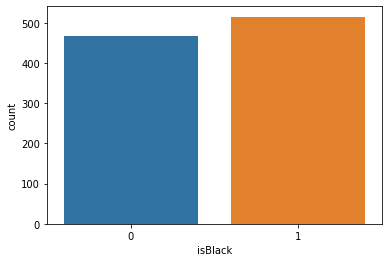

In [24]:
# data is slighlty more skewed towards the black population
sns.countplot(x = 'isBlack', data = df)

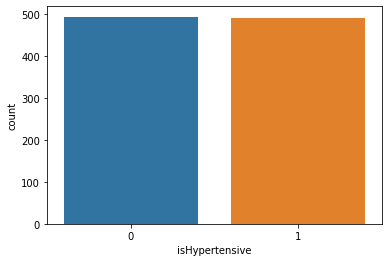

In [25]:
# even split between high and low blood presures.
sns.countplot(x = 'isHypertensive', data = df)

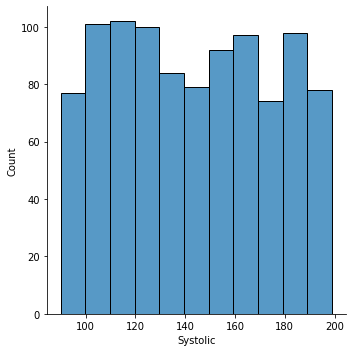

In [26]:
# even range of blood pressures
sns.displot(x = 'Systolic', data = df)

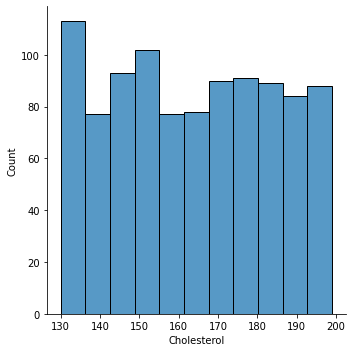

In [27]:
# data slightly skewed towards lower cholesterols
sns.displot(x = 'Cholesterol', data = df)

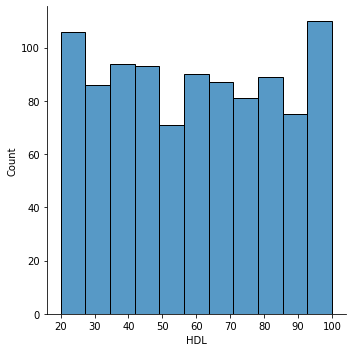

In [28]:
# data slightly skewed towards lower cholesterols
sns.displot(x = 'HDL', data = df)

In [29]:
# positive skew corresponds to the false column in categorical data
df.skew()

isMale            0.032641
isBlack          -0.098026
isSmoker         -0.057137
isDiabetic       -0.098026
isHypertensive    0.008159
Age               0.025172
Systolic          0.048899
Cholesterol       0.022941
HDL               0.026773
Risk              1.133572
dtype: float64

In [30]:
# data split

X = df.drop('Risk', axis = 1)
y = df['Risk']

In [31]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [32]:
# Linear Regression training

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [35]:
# Linear Regression evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

print(lr_mae, lr_rmse, lr_r2)

5.808193122235429 7.687859009835682 0.7946485070299797


In [33]:
# Decision Tree Regressor training

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)

In [36]:
#Decision tree evaluation

dtr_mae = mean_absolute_error(y_test, dtr_pred)
dtr_rmse = np.sqrt(mean_squared_error(y_test, dtr_pred))
dtr_r2 = r2_score(y_test, dtr_pred)

print(dtr_mae, dtr_rmse, dtr_r2)

6.306440677966102 8.648503348527509 0.7401223323922284


In [37]:
# Random Forest training 

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

In [38]:
#Random forest evaluation

rfr_mae = mean_absolute_error(y_test, rfr_pred)
rfr_rmse = np.sqrt(mean_squared_error(y_test, rfr_pred))
rfr_r2 = r2_score(y_test, rfr_pred)

print(rfr_mae, rfr_rmse, rfr_r2)

4.4243423728813545 6.218515086662635 0.8656429594631236


In [39]:
# XGBoost Regressor training

from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
xgbr_pred = xgbr.predict(X_test)

[06:18:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [40]:
#XGBoost Regressor evaluation 

xgbr_mae = mean_absolute_error(y_test, xgbr_pred)
xgbr_rmse = np.sqrt(mean_squared_error(y_test, xgbr_pred))
xgbr_r2 = r2_score(y_test, xgbr_pred)

print(xgbr_mae, xgbr_rmse, xgbr_r2)

3.6403596196740358 5.206797628992166 0.9058048718387329


In [41]:
results = pd.DataFrame({'Model': ['Linear Regression', 'Decision Tree Regressor',\
                                 'Random Forest Regressor', 'XGBoost Regressor'], 'MAE' :\
                      [lr_mae, dtr_mae, rfr_mae, xgbr_mae], 'RMSE' :\
                        [lr_rmse, dtr_rmse, rfr_rmse, xgbr_rmse], 'r2':\
                        [lr_r2, dtr_r2, rfr_r2, xgbr_r2]})

results

,Model,MAE,RMSE,r2
0,Linear Regression,5.808193,7.687859,0.794649
1,Decision Tree Regressor,6.306441,8.648503,0.740122
2,Random Forest Regressor,4.424342,6.218515,0.865643
3,XGBoost Regressor,3.640360,5.206798,0.905805


# **MultiLayer Perceptron with MAE and MSE**

In [45]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [46]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(9, 4),
      nn.LeakyReLU(),
      nn.Linear(4, 1),
      nn.Tanh()
    )


  def forward(self, x):
    '''
      Forward pass
    '''
    return self.layers(x)

In [48]:
dataset = pd.read_csv('/content/sample_data/heartRisk.csv')
x_df = dataset.iloc[:, 0:-1]
t_df = dataset.iloc[:,-1:]

x_df.head()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL
0,1,1,0,1,1,49,101,181,32
1,0,0,0,1,1,69,167,155,59
2,0,1,1,1,1,50,181,147,59
3,1,1,1,1,0,42,145,166,46
4,0,0,1,0,1,66,134,199,63


In [49]:
min(x_df.iloc[:, 5])

40

In [50]:
# normalize data with min max

for i in range(9):
    x_df.iloc[:, i] = (x_df.iloc[:, i] - min(x_df.iloc[:, i])) / (max(x_df.iloc[:, i]) - min(x_df.iloc[:, i]))
print(x_df.head())

# normalize target
#t_df.iloc[:, 0] = (t_df.iloc[:,0] - min(t_df.iloc[:,0])) / (max(t_df.iloc[:,0]) - min(t_df.iloc[:,0]))
#print(t_df.head())

   isMale  isBlack  isSmoker  isDiabetic  isHypertensive       Age  Systolic  \
0     1.0      1.0       0.0         1.0             1.0  0.230769  0.100000   
1     0.0      0.0       0.0         1.0             1.0  0.743590  0.700000   
2     0.0      1.0       1.0         1.0             1.0  0.256410  0.827273   
3     1.0      1.0       1.0         1.0             0.0  0.051282  0.500000   
4     0.0      0.0       1.0         0.0             1.0  0.666667  0.400000   

   Cholesterol     HDL  
0     0.728571  0.1500  
1     0.357143  0.4875  
2     0.242857  0.4875  
3     0.514286  0.3250  
4     0.985714  0.5375  


In [51]:
# dataframe to torch
x_np = x_df.to_numpy()
t_np = t_df.to_numpy() /100

x = torch.from_numpy(x_np)
t = torch.from_numpy(t_np)

In [52]:
# Splitting the dataset into the Training data set and Testing data set
from sklearn.model_selection import train_test_split

# 30% data for testing, random state 1
X_train, X_test, y_train, y_test = train_test_split(x, t, train_size=.7, random_state=1)

In [53]:
# Initialize the MLP
mlp = MLP()

# Define the loss function and optimizer
loss_function = nn.L1Loss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

In [54]:
# Run the training loop
for epoch in range(0, 100):

    # Set current loss value
    current_loss = 0.0

    # Iterate over the DataLoader for training data
    for i, data in enumerate(X_train):

        # Get and prepare inputs
        x_in = data
        targets = y_train[i]
        x_in, target = x_in.float(), targets.float()
        #       target = target.reshape((target.shape[0], 1))

        # Zero the gradients
        optimizer.zero_grad()

        # Perform forward pass
        output = mlp(x_in)

        # Compute loss
        loss = loss_function(output, target)

        # Perform backward pass
        loss.backward()

        # Perform optimization
        optimizer.step()

        # Print statistics
        current_loss += loss.item()
    if epoch % 10 == 0:
        print('Epoch:', epoch+1, 'Loss:', current_loss)
      

# Process is complete.
print('Training process has finished.')

Epoch: 1 Loss: 158.19917940394953
Epoch: 11 Loss: 71.9224452348426
Epoch: 21 Loss: 52.53688298817724
Epoch: 31 Loss: 45.15979704959318
Epoch: 41 Loss: 42.92516786104534
Epoch: 51 Loss: 41.96143917134032
Epoch: 61 Loss: 41.389960299711674
Epoch: 71 Loss: 40.83484712988138
Epoch: 81 Loss: 40.30566164571792
Epoch: 91 Loss: 39.88349640718661
Training process has finished.


In [55]:
output_test = np.zeros((max(y_test.shape), 1), dtype=float)
for i in range(len(X_test)):
    x_in = X_test[i, :].float()
    output_test[i, 0] = mlp(x_in)

In [56]:
mean_squared_error(output_test, y_test, squared=False)

0.08428322944647895

In [57]:
mean_absolute_error(output_test, y_test)

0.057409167174687616

# **Heart Risk prediction RMSE (Feature evalution)**

In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
from warnings import filterwarnings as filt 
from scipy.stats import skew, norm 
import plotly.express as px 

filt('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,8)

In [59]:
df = pd.read_csv('/content/sample_data/heartRisk.csv')
df.shape

(1000, 10)

In [60]:
df.head()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
0,1,1,0,1,1,49,101,181,32,11.1
1,0,0,0,1,1,69,167,155,59,30.1
2,0,1,1,1,1,50,181,147,59,37.6
3,1,1,1,1,0,42,145,166,46,13.2
4,0,0,1,0,1,66,134,199,63,15.1


In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
isMale,1000.0,0.490,0.500150,0.0,0.0,0.0,1.0,1.0
isBlack,1000.0,0.530,0.499349,0.0,0.0,1.0,1.0,1.0
isSmoker,1000.0,0.516,0.499994,0.0,0.0,1.0,1.0,1.0
isDiabetic,1000.0,0.522,0.499766,0.0,0.0,1.0,1.0,1.0
isHypertensive,1000.0,0.495,0.500225,0.0,0.0,0.0,1.0,1.0
Age,1000.0,59.107,11.536492,40.0,49.0,59.0,69.0,79.0
Systolic,1000.0,144.249,31.774528,90.0,117.0,144.0,171.0,200.0
Cholesterol,1000.0,164.043,20.329891,130.0,146.0,164.0,182.0,200.0
HDL,1000.0,59.603,23.863505,20.0,39.0,59.0,81.0,100.0
Risk,1000.0,19.667,17.043941,0.1,6.3,14.4,29.0,85.4


In [62]:
df.isnull().values.sum()

0

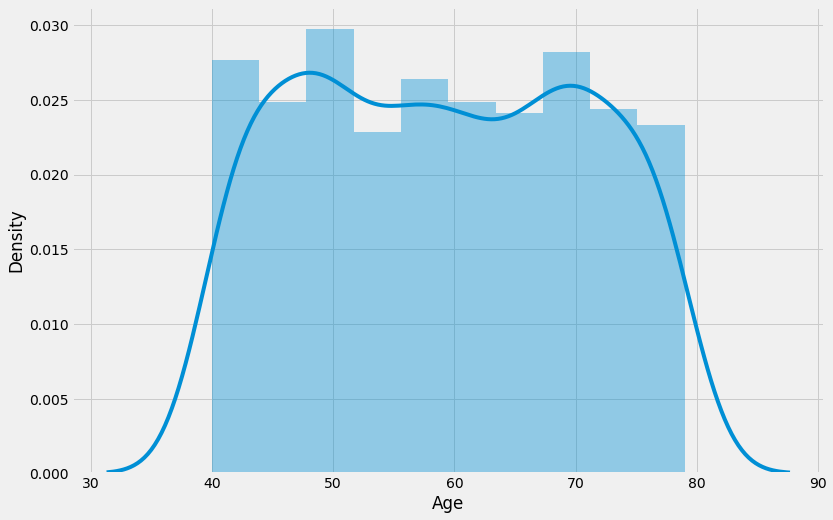

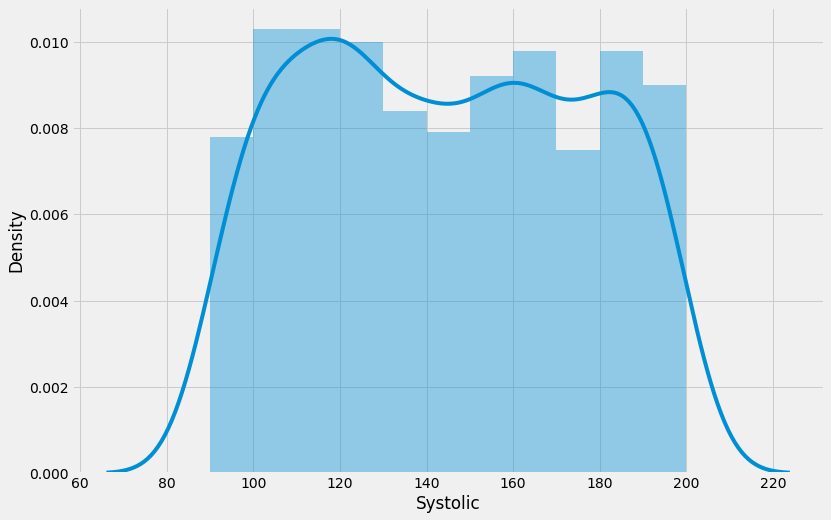

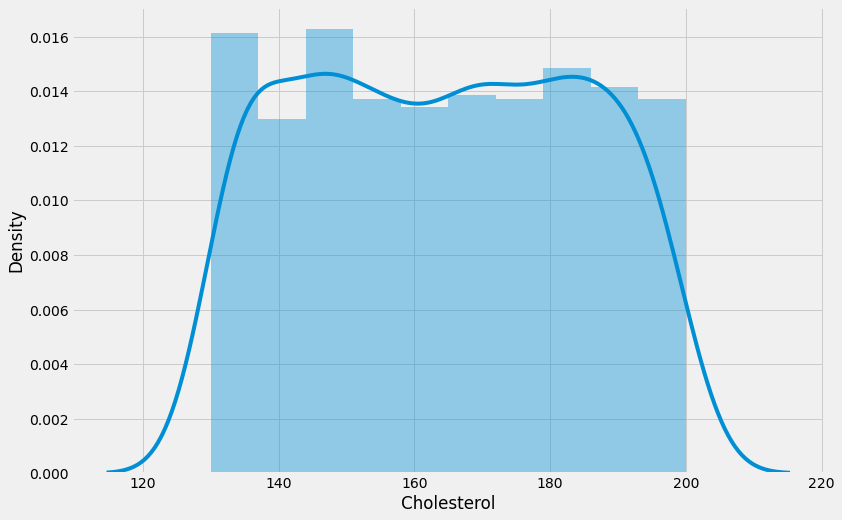

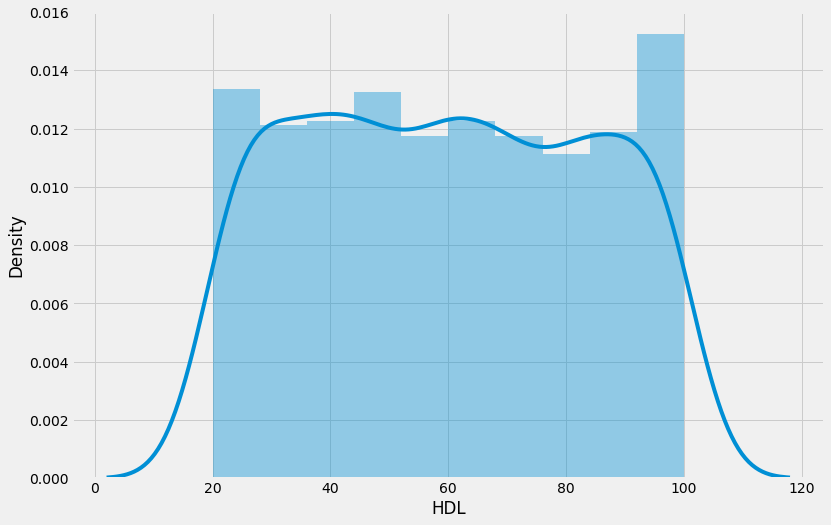

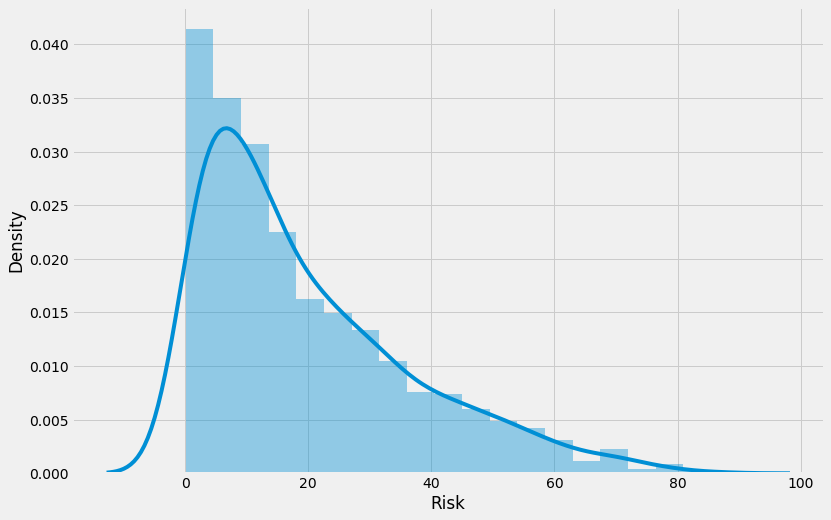

In [63]:
for ind, col in enumerate(df.loc[:, 'Age':].columns):
    plt.figure(ind)
    sns.distplot(df[col])

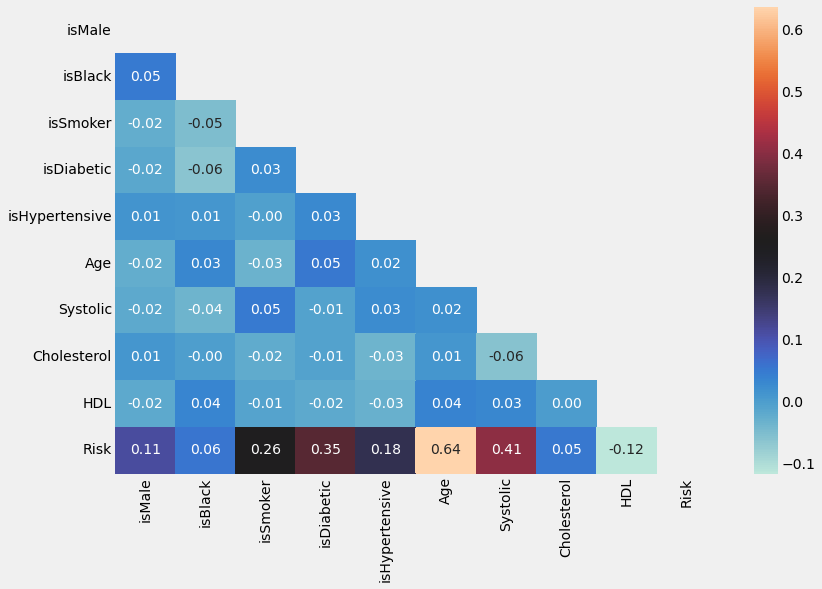

In [64]:
corr = df.corr()
lower_corr = corr.where(np.tril(np.ones(df.corr().shape), k = -1).astype(bool))
sns.heatmap(lower_corr, fmt = '.2f', annot = True, cmap = 'icefire')

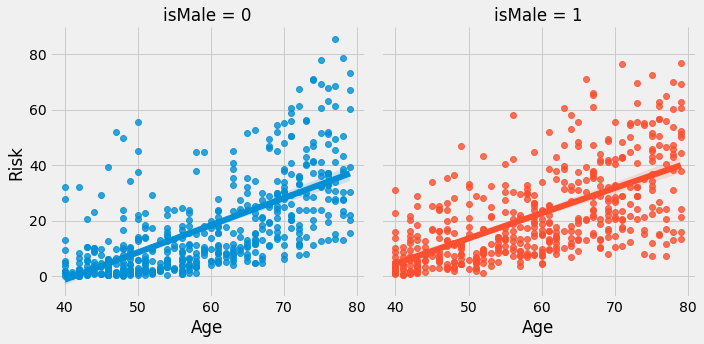

In [65]:
sns.lmplot(data = df, x = 'Age', y = 'Risk', hue = 'isMale', col = 'isMale')

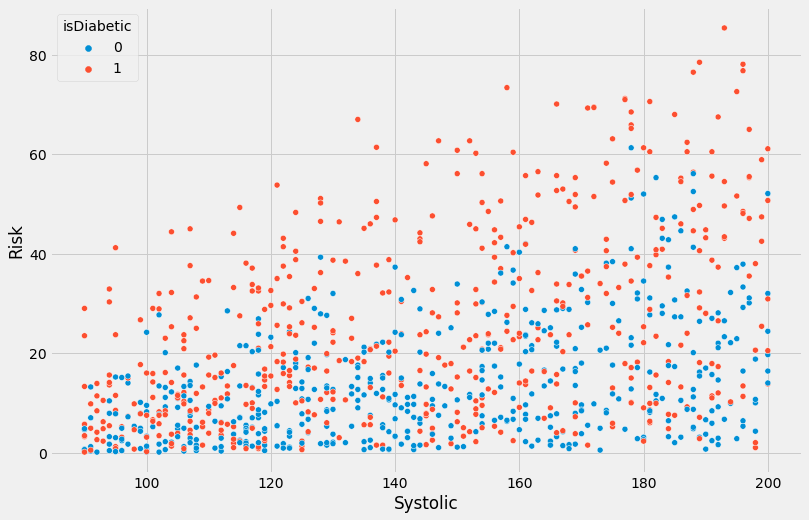

In [66]:
sns.scatterplot(data = df, x = 'Systolic', y = 'Risk', hue = 'isDiabetic')

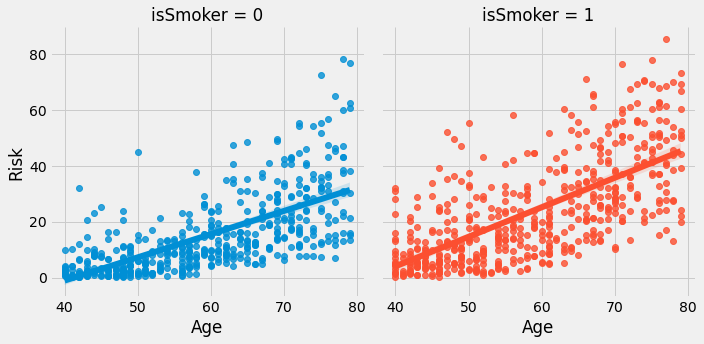

In [67]:
sns.lmplot(data = df, x = 'Age', y = 'Risk', hue = 'isSmoker', col = 'isSmoker')

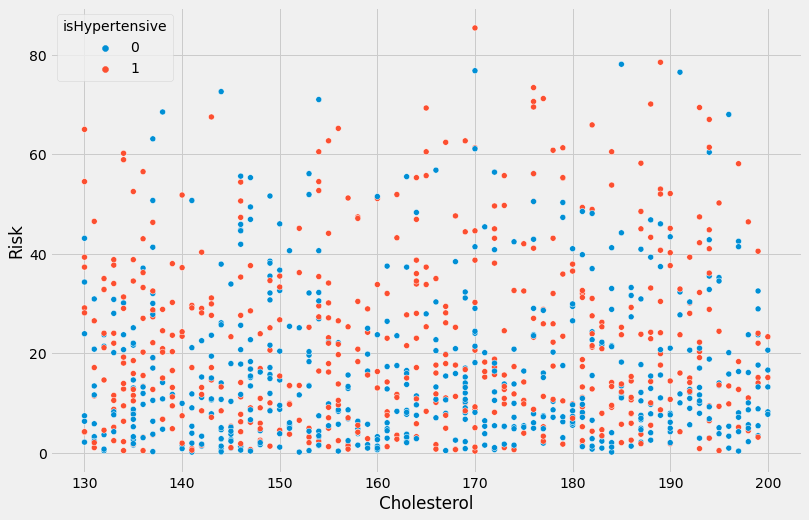

In [68]:
sns.scatterplot(data = df, x = 'Cholesterol', y = 'Risk', hue = 'isHypertensive')

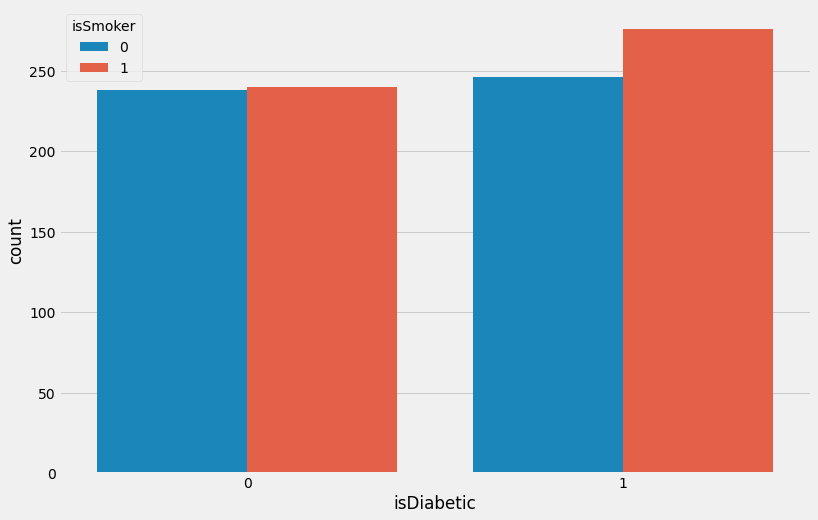

In [69]:
sns.countplot(df.isDiabetic , hue = df.isSmoker)

In [71]:
# systolic is a blood pressure and if its below 120 mm Hg its considered as normal and but if its in range 120 - 139 then there's a risk 
def systolic(x):
    if x < 120: return 'normal'
    elif x >= 120 and x <= 139 : return 'elevated'
    else: return 'high_pressure'

In [72]:
df['Systolic_levels'] = df.Systolic.apply(lambda x : systolic(x))
df.head()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk,Systolic_levels
0,1,1,0,1,1,49,101,181,32,11.1,normal
1,0,0,0,1,1,69,167,155,59,30.1,high_pressure
2,0,1,1,1,1,50,181,147,59,37.6,high_pressure
3,1,1,1,1,0,42,145,166,46,13.2,high_pressure
4,0,0,1,0,1,66,134,199,63,15.1,elevated


In [73]:
df.head(1000)

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk,Systolic_levels
0,1,1,0,1,1,49,101,181,32,11.1,normal
1,0,0,0,1,1,69,167,155,59,30.1,high_pressure
2,0,1,1,1,1,50,181,147,59,37.6,high_pressure
3,1,1,1,1,0,42,145,166,46,13.2,high_pressure
4,0,0,1,0,1,66,134,199,63,15.1,elevated
...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,1,1,1,42,110,175,67,3.9,normal
996,0,1,0,1,0,75,123,130,56,23.9,elevated
997,1,1,1,0,1,76,178,179,30,61.3,high_pressure
998,0,1,1,1,0,65,139,169,66,32.3,elevated


In [74]:
dummy_sus = pd.get_dummies(df.Systolic_levels, prefix = 'Blood_pressure')
df = df.drop(['Systolic_levels'], axis = 1)
df = pd.concat([df, dummy_sus], axis = 1)

In [75]:
df.head()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk,Blood_pressure_elevated,Blood_pressure_high_pressure,Blood_pressure_normal
0,1,1,0,1,1,49,101,181,32,11.1,0,0,1
1,0,0,0,1,1,69,167,155,59,30.1,0,1,0
2,0,1,1,1,1,50,181,147,59,37.6,0,1,0
3,1,1,1,1,0,42,145,166,46,13.2,0,1,0
4,0,0,1,0,1,66,134,199,63,15.1,1,0,0


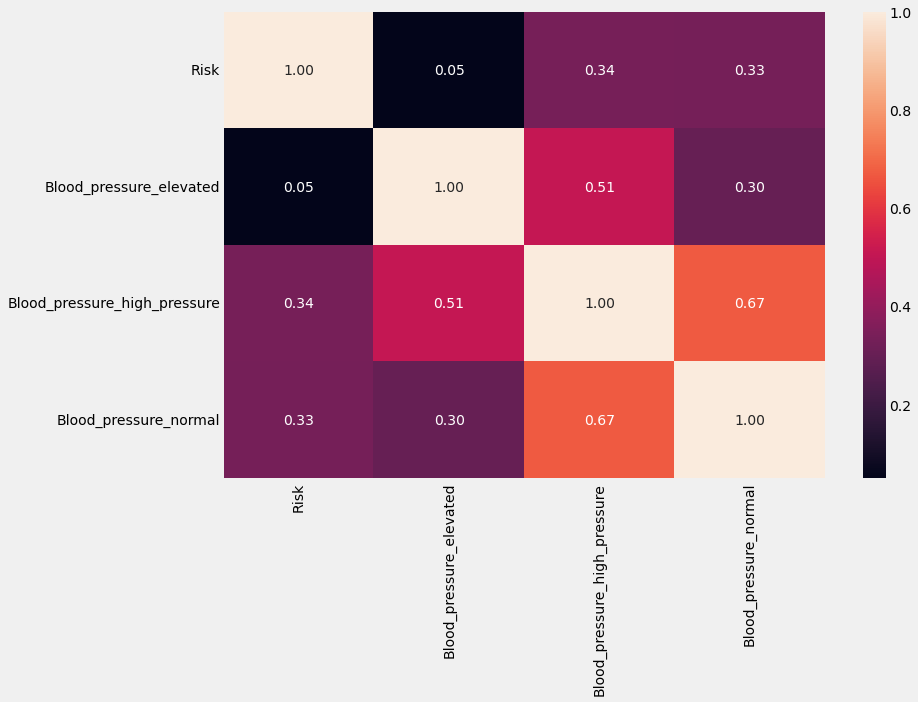

In [76]:
sns.heatmap(df.loc[:, 'Risk':].corr().abs(), fmt = '.2f', annot = True)

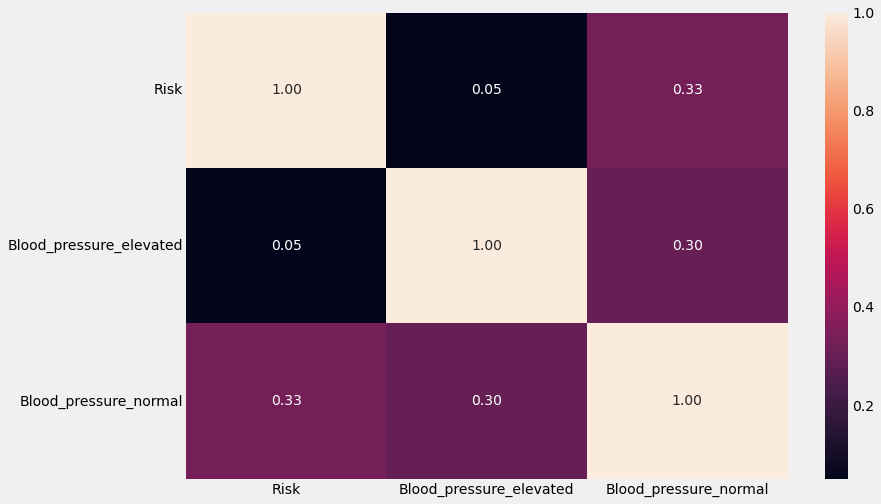

In [77]:
sns.heatmap(df.loc[:, 'Risk':].drop(['Blood_pressure_high_pressure'], axis = 1).corr().abs(), fmt = '.2f', annot = True)

In [78]:
df = df.drop(['Blood_pressure_high_pressure'], axis = 1)

In [79]:
df.head()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk,Blood_pressure_elevated,Blood_pressure_normal
0,1,1,0,1,1,49,101,181,32,11.1,0,1
1,0,0,0,1,1,69,167,155,59,30.1,0,0
2,0,1,1,1,1,50,181,147,59,37.6,0,0
3,1,1,1,1,0,42,145,166,46,13.2,0,0
4,0,0,1,0,1,66,134,199,63,15.1,1,0


In [82]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 17.8 MB/s 
     |████████████████████████████████| 133 kB 55.7 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=99ca9640ad2cd05fcf781794a2c7ac00c68fcea2ae886293aa8499198197d8f1
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inc

In [84]:
pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 1.5 MB/s 
     |████████████████████████████████| 13.1 MB 60.6 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=97dc5abb12418b3e60e7ae177d37a9b251ba3f9486e6208d1135f4ec09065c49
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [85]:
import eli5
from eli5 import show_weights
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestRegressor
from pdpbox.pdp import * 
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split

In [86]:
def permImp(x, y):
    model = RandomForestRegressor().fit(x, y)
    perm = PermutationImportance(model).fit(x, y)
    return show_weights(perm, feature_names = x.columns.tolist())

def plot_mi(score):
    score = score.sort_values('mi_score', ascending = True)
    plt.barh(score.index, score.mi_score)
    return 

def mi_score(x, y):
    score = pd.DataFrame(mutual_info_regression(x, y, discrete_features = False, random_state = 123), index = x.columns, columns = ['mi_score']).sort_values('mi_score', ascending = False)
    plot_mi(score)
    return score

def isolate(x, y, col):
    model = RandomForestRegressor().fit(x, y)
    dist = pdp_isolate(model, model_features = x.columns, dataset = x, feature = col)
    return pdp_plot(dist, feature_name = col)

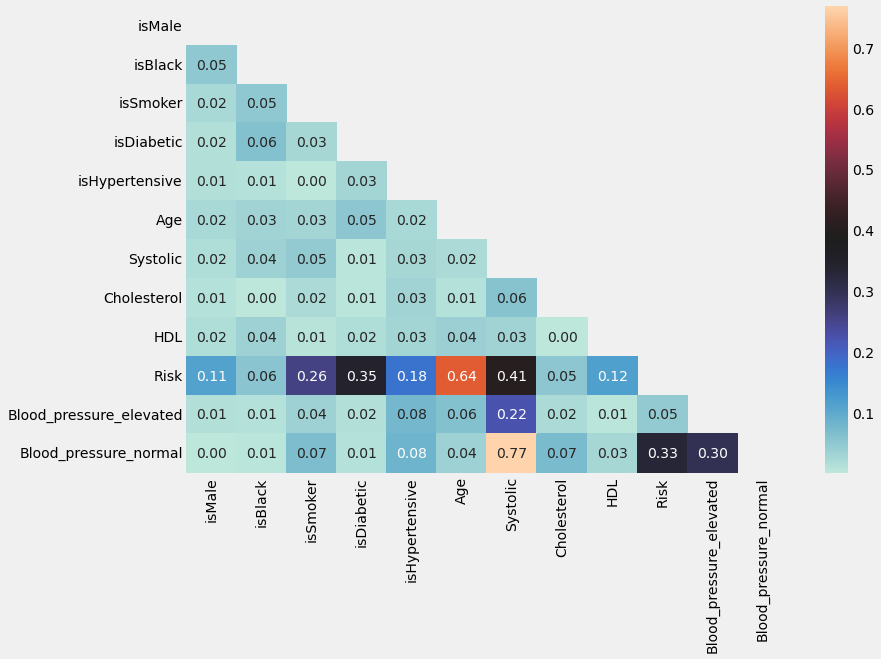

In [87]:
corr = df.corr().abs()
lower_corr = corr.where(np.tril(np.ones(df.corr().shape), k = -1).astype(bool))
sns.heatmap(lower_corr, fmt = '.2f', annot = True, cmap = 'icefire')

In [88]:
x = df.drop(['Risk'], axis = 1)
y = df.Risk
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
x_train.shape, x_test.shape

((700, 11), (300, 11))

# **Feature Importance - code**

In [89]:
permImp(x, y)

Weight,Feature
1.0421 ± 0.0656,Age
0.4217 ± 0.0552,Systolic
0.2757 ± 0.0226,isDiabetic
0.1229 ± 0.0055,isSmoker
0.0852 ± 0.0125,HDL
0.0578 ± 0.0142,isBlack
0.0233 ± 0.0029,Cholesterol
0.0210 ± 0.0034,isHypertensive
0.0192 ± 0.0035,isMale
0.0011 ± 0.0003,Blood_pressure_normal


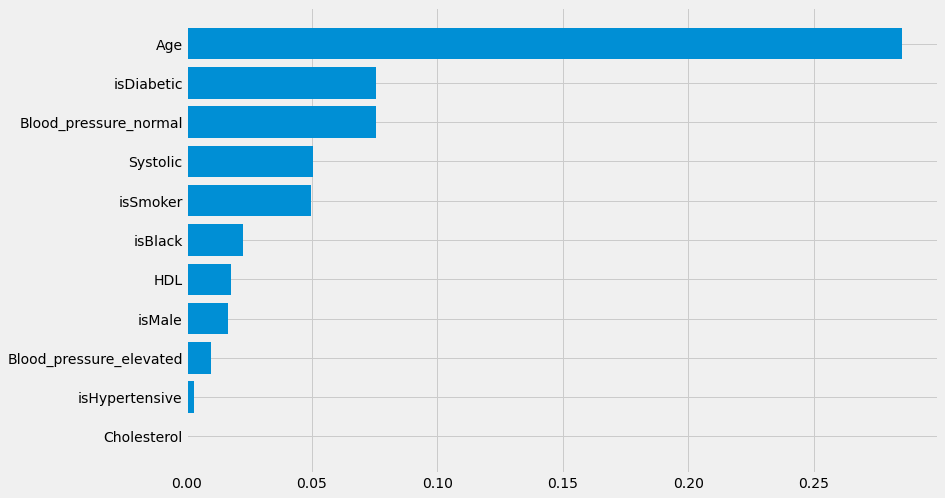

In [90]:
mscore = mi_score(x, y)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f7289569110>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f7289544790>})

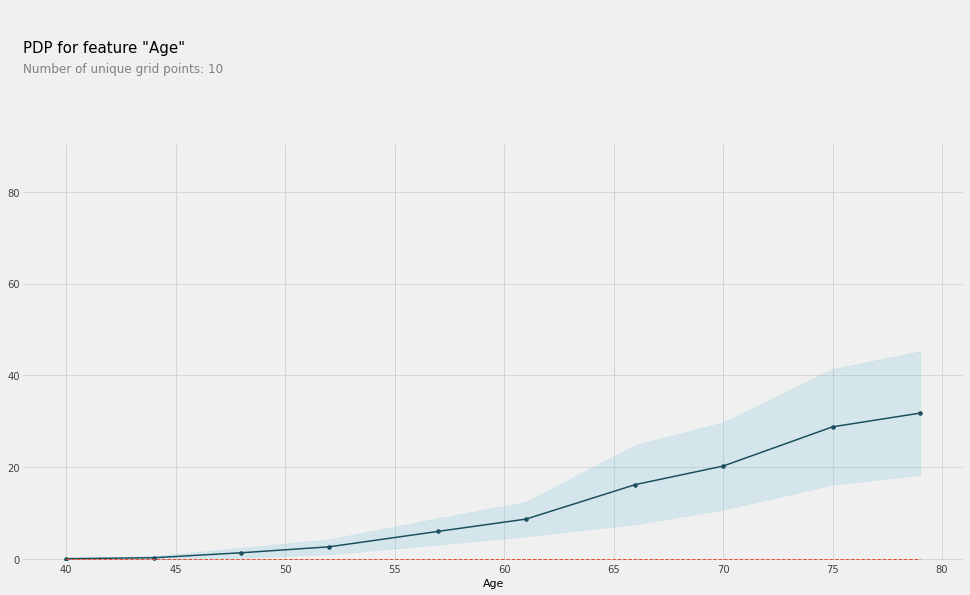

In [91]:
isolate(x, y, 'Age')

# **Model Building - code**

In [92]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [93]:
def best_model(x, y, fold = 10):
    models = [LinearRegression(), Lasso(), Ridge(), SVR(), DecisionTreeRegressor(), RandomForestRegressor(), LGBMRegressor()]
    mnames = ['linar regg', 'lasso', 'ridge', 'svm', 'decision tree', 'random forest', 'lgbm']
    scalers = [None, StandardScaler(), RobustScaler(), MinMaxScaler()]
    snames = ['none', 'std', 'robust', 'minmax']
    scores = [[] for _ in range(4)]
    
    print(f'Total number of iterations : {len(mnames) * len(snames)}')
    for model in models:
        for ind, scaler in enumerate(scalers):
            if scaler:
                model = Pipeline(steps = [('scaler', scaler), ('model', model)])
            score = cross_val_score(model, x, y, cv = fold, scoring = 'neg_mean_squared_error').mean()
            rmse = np.sqrt(-1 * score)
            scores[ind].append(rmse)
            
    return pd.DataFrame(scores, index = snames, columns = mnames).T

def report(xt, yt, xtest, ytest, pred, model):
    print(' REPORT '.center(60, '='))
    print()
    print(f'Training RMSE :====> {np.sqrt(mean_squared_error(yt, model.predict(xt)))}')
    print(f'Testing  RMSE :====> {np.sqrt(mean_squared_error(ytest, pred))}')
    print()
    print(f"Training  MAE :====> {mean_absolute_error(yt, model.predict(xt))}")
    print(f'Testing   MAE :====> {mean_absolute_error(ytest, pred)}')
    print()
    return pd.DataFrame({
        'actual value' : ytest.values,
        'predicted value' : pred
    }).head()

def get_score(xt, yt, xtest, ytest, model, scaler = None, predict = True):
    if scaler:
        model = Pipeline(steps = [('scaler', scaler), ('model', model)])
    
    model.fit(xt, yt)
    pred = model.predict(xtest)
    return report(xt, yt, xtest, ytest, pred, model)
    
def gridcv(x, y, model, params, scaler = None, fold = 10):
    if scaler:
        model = Pipeline(steps = [('scaler', scaler), ('model', model)])
    clf = GridSearchCV(model, param_grid = params, cv = fold, scoring = 'neg_mean_squared_error', return_train_score = True, verbose = 2, n_jobs = -1)
    clf.fit(x, y)
    res = pd.DataFrame(clf.cv_results_)
    res[['mean_train_score', 'mean_test_score']] = np.sqrt(-1 * res[['mean_train_score', 'mean_test_score']]) 
    res = res[['mean_train_score', 'mean_test_score', 'params']]
    return clf, res.sort_values('mean_test_score', ascending = True)

def plot_cv(res):
    sns.lineplot(x = res.reset_index().index, y = res.mean_train_score)
    sns.lineplot(x = res.reset_index().index, y = res.mean_test_score)
    plt.title('RMSE comparision')
    plt.legend(['train', 'test'])

In [94]:
best_model(x_train, y_train)

Total number of iterations : 28


,none,std,robust,minmax
linar regg,7.712906,7.712906,7.712906,7.712906
lasso,8.788488,8.301750,8.301750,8.301750
ridge,7.712168,7.712500,7.712500,7.712500
svm,14.866618,9.337689,9.337689,9.337689
decision tree,9.178859,9.335766,9.309055,9.286659
random forest,6.708090,6.646719,6.745085,6.662026
lgbm,4.858293,4.858293,4.858293,4.860921


In [95]:
get_score(x_train, y_train, x_test, y_test, LGBMRegressor(), StandardScaler())

========================== REPORT ==========================

Training RMSE :====> 1.8004277516726837
Testing  RMSE :====> 4.52985228041303

Training  MAE :====> 1.1528097051924941
Testing   MAE :====> 3.1824998493509695



,actual value,predicted value
0,51.5,56.496092
1,1.3,0.947410
2,0.1,-0.218849
3,11.4,10.730386
4,7.9,11.525436


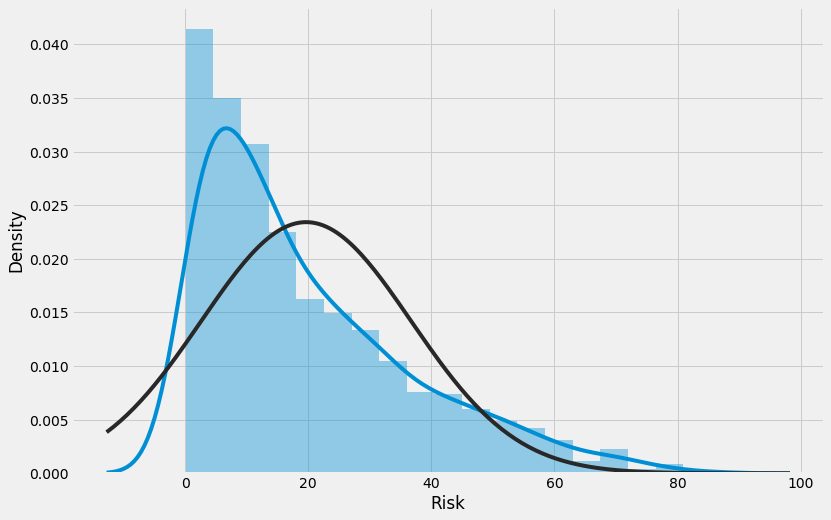

In [96]:
sns.distplot(df.Risk, fit = norm)

In [97]:
og_risk = df.Risk
df['Risk'] = np.round(np.log1p(df.Risk), 2)

In [98]:
df.Risk.head(100)

0     2.49
1     3.44
2     3.65
3     2.65
4     2.78
      ... 
95    0.53
96    2.54
97    4.03
98    1.46
99    3.98
Name: Risk, Length: 100, dtype: float64

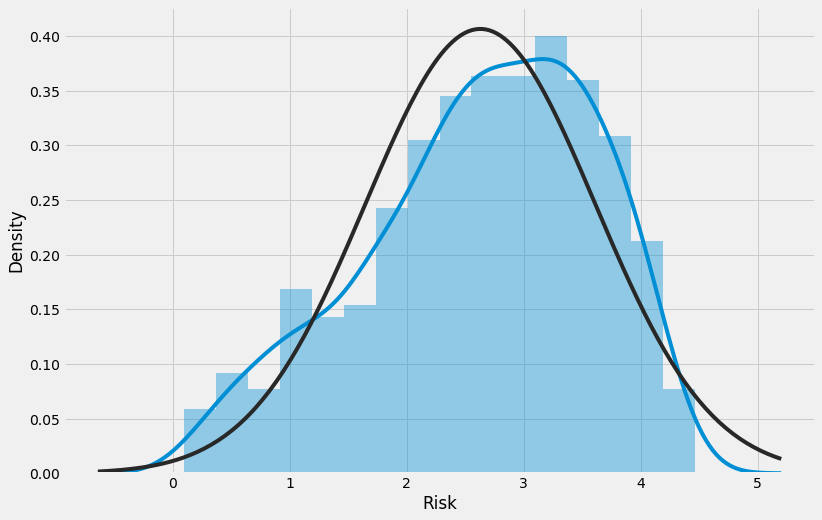

In [99]:
sns.distplot(df.Risk, fit = norm)

In [100]:
new_x = df.drop(['Risk'], axis = 1)
new_y = df.Risk
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, new_y, test_size = 0.3)
new_x_train.shape, x_test.shape

((700, 11), (300, 11))

In [101]:
best_model(new_x_train, new_y_train)

Total number of iterations : 28


,none,std,robust,minmax
linar regg,0.330903,0.330903,0.330903,0.330903
lasso,0.591593,0.993680,0.993680,0.993680
ridge,0.330892,0.330902,0.330902,0.330902
svm,0.582528,0.143167,0.143167,0.143167
decision tree,0.546812,0.530581,0.525348,0.527992
random forest,0.344248,0.339141,0.345246,0.342474
lgbm,0.222719,0.222719,0.222719,0.222719


**After normalizing the target variable, all models RMSE reduced tremendously**

In [102]:
get_score(new_x_train, new_y_train, new_x_test, new_y_test, SVR(), StandardScaler())

========================== REPORT ==========================

Training RMSE :====> 0.08632335856257176
Testing  RMSE :====> 0.1328760269743772

Training  MAE :====> 0.07487534778691617
Testing   MAE :====> 0.09841154274037307



,actual value,predicted value
0,1.28,1.295451
1,4.12,3.841172
2,2.24,2.202772
3,2.21,2.002801
4,4.02,3.992503


In [103]:
params = {
    'C' : [1, 50, 100, 500],
    'kernel' : ['rbf', 'sigmoid'],
    'gamma' : ['scale', 'auto'],
    'epsilon' : [0.1, 0.01, 1, 0.5]
}

pip_params = {f"model__{key}" : values for key, values in params.items()}
pip_params

{'model__C': [1, 50, 100, 500],
 'model__epsilon': [0.1, 0.01, 1, 0.5],
 'model__gamma': ['scale', 'auto'],
 'model__kernel': ['rbf', 'sigmoid']}

In [104]:
clf, results = gridcv(new_x_train, new_y_train, SVR(), pip_params, StandardScaler(), 5)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


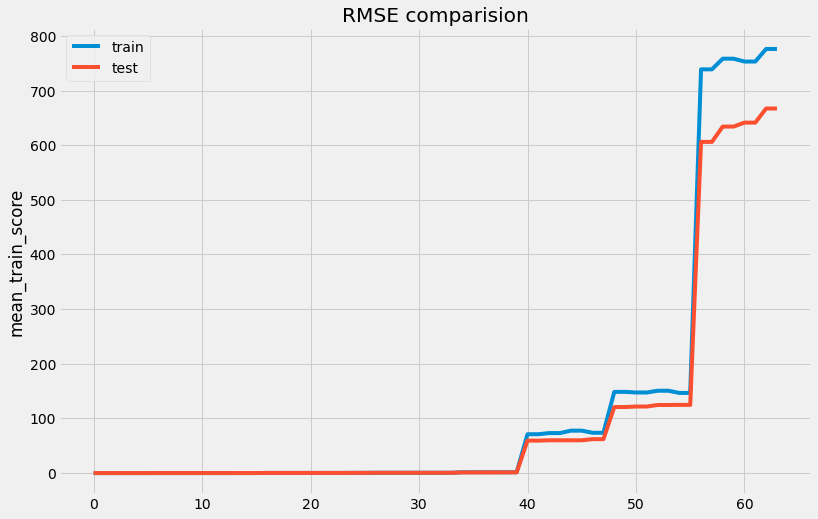

In [105]:
plot_cv(results)

In [106]:
results.head(10)

,mean_train_score,mean_test_score,params
20,0.009722,0.097659,"{'model__C': 50, 'model__epsilon': 0.01, 'mode..."
36,0.009722,0.097659,"{'model__C': 100, 'model__epsilon': 0.01, 'mod..."
52,0.009722,0.097659,"{'model__C': 500, 'model__epsilon': 0.01, 'mod..."
38,0.009722,0.097659,"{'model__C': 100, 'model__epsilon': 0.01, 'mod..."
54,0.009722,0.097659,"{'model__C': 500, 'model__epsilon': 0.01, 'mod..."
22,0.009722,0.097659,"{'model__C': 50, 'model__epsilon': 0.01, 'mode..."
4,0.060893,0.128354,"{'model__C': 1, 'model__epsilon': 0.01, 'model..."
6,0.060893,0.128354,"{'model__C': 1, 'model__epsilon': 0.01, 'model..."
18,0.079095,0.139279,"{'model__C': 50, 'model__epsilon': 0.1, 'model..."
16,0.079095,0.139279,"{'model__C': 50, 'model__epsilon': 0.1, 'model..."


In [107]:
clf.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=50, epsilon=0.01))])

In [108]:
get_score(new_x_train, new_y_train, new_x_test, new_y_test, clf.best_estimator_)

========================== REPORT ==========================

Training RMSE :====> 0.009627988764154419
Testing  RMSE :====> 0.07475521564650847

Training  MAE :====> 0.00942091692830202
Testing   MAE :====> 0.05270993349781815



,actual value,predicted value
0,1.28,1.223670
1,4.12,3.946999
2,2.24,2.268996
3,2.21,2.152978
4,4.02,3.991857


In [109]:
from sklearn.manifold import TSNE

In [110]:
tsne = TSNE(n_components = 2, n_iter=5000)
tsne_x = tsne.fit_transform(new_x)
tsne_x

array([[-33.03584  , -24.550306 ],
       [ 10.386224 ,  -7.9855056],
       [ 22.243464 , -22.453154 ],
       ...,
       [ 11.299044 , -35.91793  ],
       [  0.6743127,  15.985697 ],
       [ 22.977736 , -30.630013 ]], dtype=float32)

In [111]:
tsne_x = pd.DataFrame(tsne_x, columns = ['x', 'y'])
tsne_x = pd.concat([tsne_x, new_x[['isMale', 'isSmoker', 'Blood_pressure_normal']]], axis = 1)
tsne_x.head()

,x,y,isMale,isSmoker,Blood_pressure_normal
0,-33.035839,-24.550306,1,0,1
1,10.386224,-7.985506,0,0,0
2,22.243464,-22.453154,0,1,0
3,-9.786731,-15.763205,1,1,0
4,-0.832431,23.201864,0,1,0


In [112]:
df.head()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk,Blood_pressure_elevated,Blood_pressure_normal
0,1,1,0,1,1,49,101,181,32,2.49,0,1
1,0,0,0,1,1,69,167,155,59,3.44,0,0
2,0,1,1,1,1,50,181,147,59,3.65,0,0
3,1,1,1,1,0,42,145,166,46,2.65,0,0
4,0,0,1,0,1,66,134,199,63,2.78,1,0


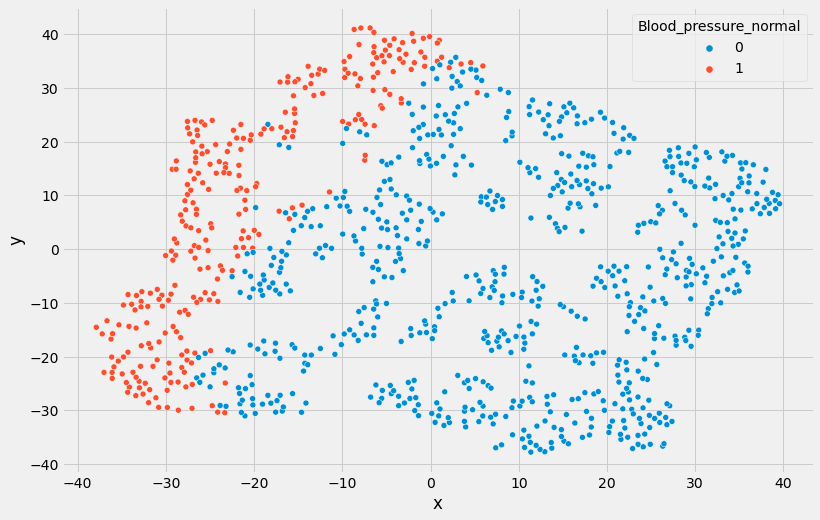

In [113]:
sns.scatterplot(data = tsne_x, x = 'x', y = 'y', hue = 'Blood_pressure_normal')

In [114]:
tsne_x = pd.DataFrame(tsne_x, columns = ['x', 'y'])
tsne_x = pd.concat([tsne_x, new_x[['isMale', 'isSmoker', 'Blood_pressure_elevated']]], axis = 1)
tsne_x.head()

,x,y,isMale,isSmoker,Blood_pressure_elevated
0,-33.035839,-24.550306,1,0,0
1,10.386224,-7.985506,0,0,0
2,22.243464,-22.453154,0,1,0
3,-9.786731,-15.763205,1,1,0
4,-0.832431,23.201864,0,1,1


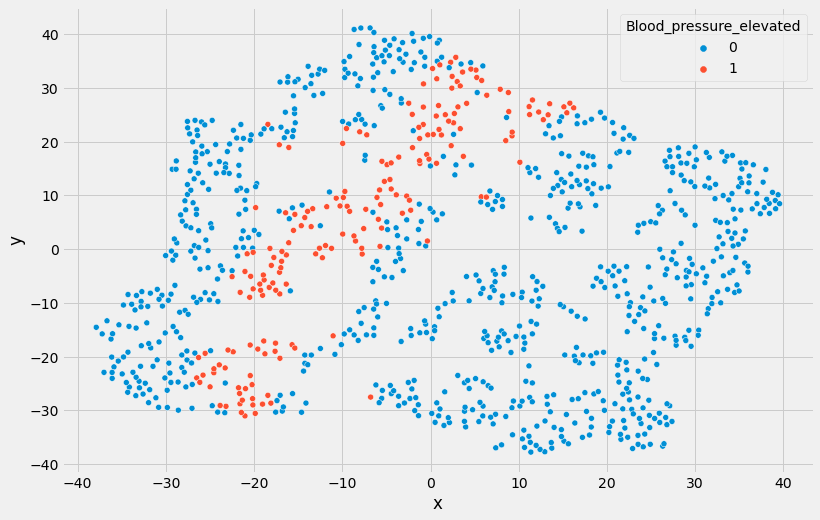

In [115]:
sns.scatterplot(data = tsne_x, x = 'x', y = 'y', hue = 'Blood_pressure_elevated')

In [116]:
tsne_x = pd.DataFrame(tsne_x, columns = ['x', 'y'])
tsne_x = pd.concat([tsne_x, new_x[['isMale', 'isDiabetic', 'Blood_pressure_normal']]], axis = 1)
tsne_x.head()

,x,y,isMale,isDiabetic,Blood_pressure_normal
0,-33.035839,-24.550306,1,1,1
1,10.386224,-7.985506,0,1,0
2,22.243464,-22.453154,0,1,0
3,-9.786731,-15.763205,1,1,0
4,-0.832431,23.201864,0,0,0


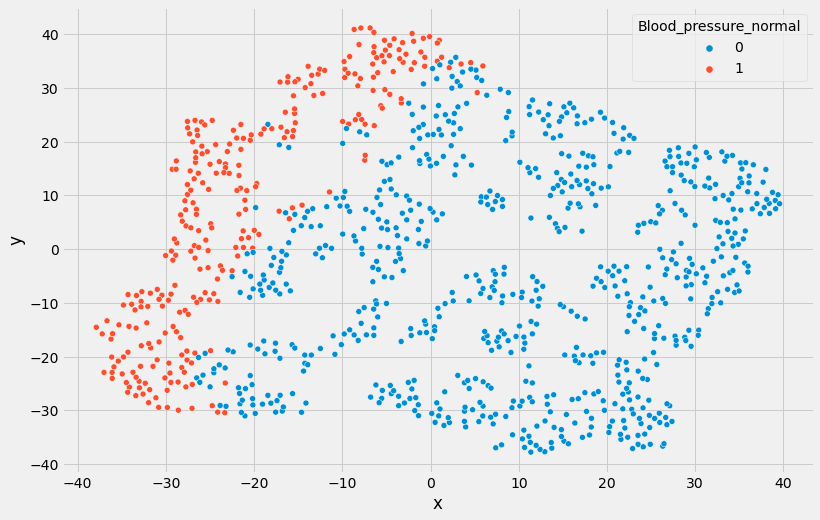

In [117]:
sns.scatterplot(data = tsne_x, x = 'x', y = 'y', hue = 'Blood_pressure_normal')